In [2]:
import cv2
import numpy as np
from sklearn.utils import shuffle
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils.utils import load_dataset, download_dataset, create_cnn_model, get_callbacks, get_preds, show_train_loss_accuracy, show_metrics, INPUT_SHAPE, OUTPUT_CLASSES
%matplotlib inline
warnings.filterwarnings('ignore')

2025-09-30 22:57:21.692415: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 22:57:22.264787: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exa

In [3]:
DATA_PATH = "./augmented_dataset"
TEST_PATH = "./data"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(TEST_PATH, "test")

In [4]:
X_train, y_train, LABEL_MAP = load_dataset(TRAIN_PATH)
X_test, y_test, _ = load_dataset(TEST_PATH)

X_train.shape, y_train.shape, LABEL_MAP

((50505, 48, 48, 3),
 (50505,),
 {'angry': 0,
  'disgust': 1,
  'fear': 2,
  'happy': 3,
  'neutral': 4,
  'sad': 5,
  'surprise': 6})

In [5]:
# Resize images from 48x48 to 144x144
import cv2

X_train = np.array([cv2.resize(img, (144, 144)) for img in X_train])
X_test = np.array([cv2.resize(img, (144, 144)) for img in X_test])
X_train.shape, X_test.shape


((50505, 144, 144, 3), (7178, 144, 144, 3))

In [6]:
from tensorflow.keras.applications import VGG19, DenseNet201, ResNet50V2

OUTPUT_CLASSES = 7
INPUT_SHAPE = (144, 144, 3)


resnet50v2 = create_cnn_model(
    ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES, flatten=True)

denseNet201 = create_cnn_model(DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES, flatten=True)

vgg19 = create_cnn_model(VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES, flatten=True)

models = {
    "ResNet50v2": resnet50v2,
    "DenseNet201": denseNet201,
    "VGG19": vgg19,
    
}

2025-09-28 10:56:50.124180: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
from tensorflow.keras.utils import to_categorical

BATCH_SIZE = 32
EPOCHS = 60
histories = {}

# Normaliza
X_train_resized = X_train.astype("float32") / 255.0
X_test_resized = X_test.astype("float32") / 255.0

# One-hot
y_train_cat = to_categorical(y_train, num_classes=OUTPUT_CLASSES)
y_test_cat = to_categorical(y_test, num_classes=OUTPUT_CLASSES)

for model_name, model in models.items():
    print(f"STRAT TRAINING MODEL {model_name}...")
    histories[model_name] = model.fit(X_train_resized, y_train_cat,
                                     validation_split=0.2,
                                     epochs=EPOCHS,
                                     batch_size=BATCH_SIZE,
                                     callbacks=get_callbacks(model_name))
    print(f"FINISH TRAINING MODEL {model_name}!")
    print("---------------------------------------------------------------")

STRAT TRAINING MODEL ResNet50v2...


2025-09-28 11:07:48.465361: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 10053808128 exceeds 10% of free system memory.


Epoch 1/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.2718 - loss: 2.3585

2025-09-28 11:22:04.946224: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 2513452032 exceeds 10% of free system memory.


1263/1263 ━━━━━━━━━━━━━━━━━━━━ 882s 690ms/step - accuracy: 0.3101 - loss: 2.1492 - val_accuracy: 0.4332 - val_loss: 1.5369 - learning_rate: 1.0000e-04
Epoch 2/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 833s 660ms/step - accuracy: 0.3711 - loss: 1.8081 - val_accuracy: 0.4591 - val_loss: 1.4449 - learning_rate: 1.0000e-04
Epoch 3/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 835s 661ms/step - accuracy: 0.4091 - loss: 1.6340 - val_accuracy: 0.4816 - val_loss: 1.3976 - learning_rate: 1.0000e-04
Epoch 4/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 842s 666ms/step - accuracy: 0.4326 - loss: 1.5416 - val_accuracy: 0.4891 - val_loss: 1.3688 - learning_rate: 1.0000e-04
Epoch 5/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 854s 676ms/step - accuracy: 0.4561 - loss: 1.4658 - val_accuracy: 0.4955 - val_loss: 1.3454 - learning_rate: 1.0000e-04
Epoch 6/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 855s 676ms/step - accuracy: 0.4731 - loss: 1.4124 - val_accuracy: 0.5012 - val_loss: 1.3304 - learning_rate: 1.0000e-04
Epoch 7/60
1263/1263 ━━━━━━━━━━━━━━━━━━

2025-09-28 18:17:33.041003: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 10053808128 exceeds 10% of free system memory.


Epoch 1/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.2717 - loss: 2.3434

2025-09-28 18:36:41.122111: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 2513452032 exceeds 10% of free system memory.


1263/1263 ━━━━━━━━━━━━━━━━━━━━ 1317s 1s/step - accuracy: 0.3169 - loss: 2.1182 - val_accuracy: 0.4428 - val_loss: 1.5050 - learning_rate: 1.0000e-04
Epoch 2/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 1242s 983ms/step - accuracy: 0.3897 - loss: 1.7504 - val_accuracy: 0.4716 - val_loss: 1.4045 - learning_rate: 1.0000e-04
Epoch 3/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 1242s 983ms/step - accuracy: 0.4225 - loss: 1.6025 - val_accuracy: 0.4908 - val_loss: 1.3610 - learning_rate: 1.0000e-04
Epoch 4/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 1208s 956ms/step - accuracy: 0.4466 - loss: 1.5056 - val_accuracy: 0.4995 - val_loss: 1.3311 - learning_rate: 1.0000e-04
Epoch 5/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 1216s 963ms/step - accuracy: 0.4624 - loss: 1.4438 - val_accuracy: 0.5071 - val_loss: 1.3132 - learning_rate: 1.0000e-04
Epoch 6/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 1241s 983ms/step - accuracy: 0.4786 - loss: 1.3895 - val_accuracy: 0.5132 - val_loss: 1.2980 - learning_rate: 1.0000e-04
Epoch 7/60
1263/1263 ━━━━━━━━━━━━━━━

2025-09-29 07:12:04.235090: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 10053808128 exceeds 10% of free system memory.


Epoch 1/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 2404s 2s/step - accuracy: 0.2647 - loss: 2.2681 - val_accuracy: 0.3747 - val_loss: 1.6494 - learning_rate: 1.0000e-04
Epoch 2/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 2364s 2s/step - accuracy: 0.3074 - loss: 1.9616 - val_accuracy: 0.3957 - val_loss: 1.5882 - learning_rate: 1.0000e-04
Epoch 3/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 2364s 2s/step - accuracy: 0.3312 - loss: 1.8278 - val_accuracy: 0.4067 - val_loss: 1.5504 - learning_rate: 1.0000e-04
Epoch 4/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 2359s 2s/step - accuracy: 0.3529 - loss: 1.7378 - val_accuracy: 0.4209 - val_loss: 1.5224 - learning_rate: 1.0000e-04
Epoch 5/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 2339s 2s/step - accuracy: 0.3698 - loss: 1.6690 - val_accuracy: 0.4210 - val_loss: 1.5108 - learning_rate: 1.0000e-04
Epoch 6/60
1263/1263 ━━━━━━━━━━━━━━━━━━━━ 2357s 2s/step - accuracy: 0.3827 - loss: 1.6245 - val_accuracy: 0.4263 - val_loss: 1.4991 - learning_rate: 1.0000e-04
Epoch 7/60
1263/1263 ━━━━━━━━━━━━━━━━━━━

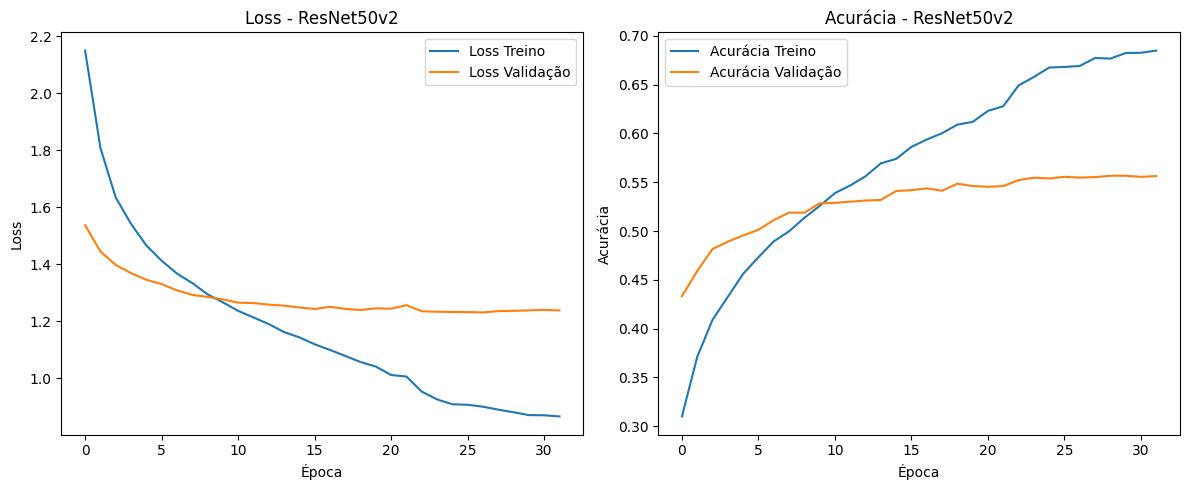

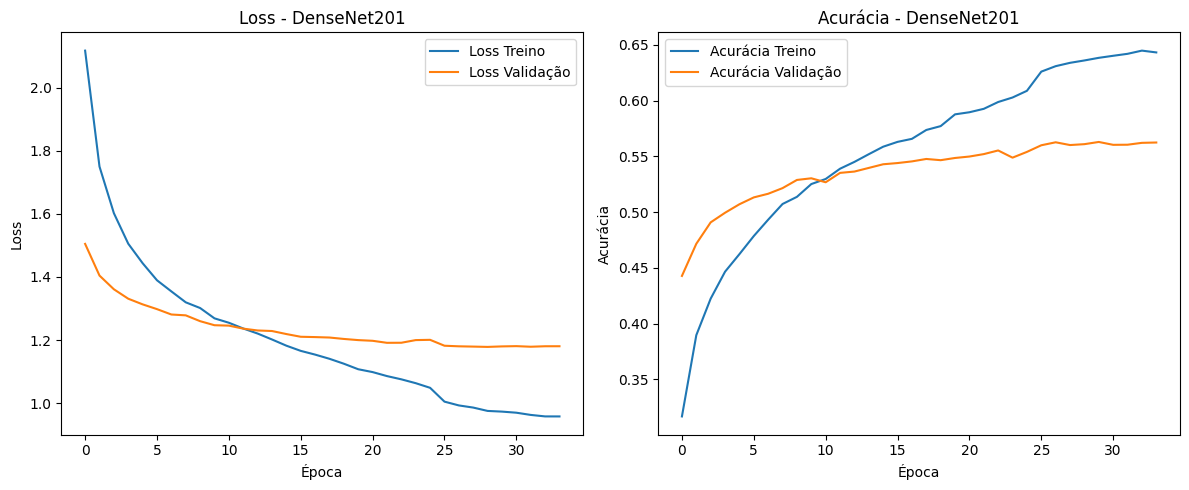

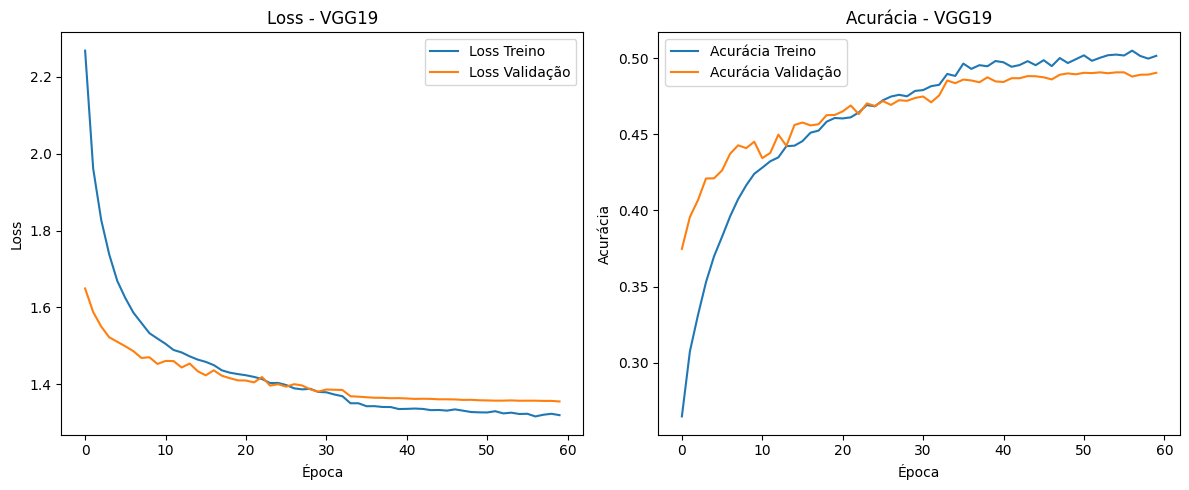

In [8]:
for model_name, history in histories.items():
    show_train_loss_accuracy(history, model_name)

In [10]:
#load models
from tensorflow.keras.models import load_model

resnet50v2 = load_model("ResNet50v2/best_ResNet50v2_model_basic.keras")
denseNet201 = load_model("DenseNet201/best_DenseNet201_model_basic.keras")
vgg19 = load_model("VGG19/best_VGG19_model_basic.keras")
models = {
    "ResNet50v2": resnet50v2,
    "DenseNet201": denseNet201,
    "VGG19": vgg19,
    
}


In [13]:
from tensorflow.keras.utils import to_categorical
y_preds = {}
# Normaliza
X_train_resized = X_train.astype("float32") / 255.0
X_test_resized = X_test.astype("float32") / 255.0

# One-hot
y_train_cat = to_categorical(y_train, num_classes=OUTPUT_CLASSES)
y_test_cat = to_categorical(y_test, num_classes=OUTPUT_CLASSES)
for model_name, model in models.items():
    y_preds[model_name] = get_preds(X_train_resized, model)

2025-09-30 23:26:20.932555: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 12567260160 exceeds 10% of free system memory.


1579/1579 ━━━━━━━━━━━━━━━━━━━━ 697s 436ms/step


2025-09-30 23:44:57.692025: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 12567260160 exceeds 10% of free system memory.


1579/1579 ━━━━━━━━━━━━━━━━━━━━ 1250s 785ms/step


2025-10-01 00:10:59.959944: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 12567260160 exceeds 10% of free system memory.
2025-10-01 00:13:45.384175: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169869312 exceeds 10% of free system memory.
2025-10-01 00:13:45.445414: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169869312 exceeds 10% of free system memory.


1579/1579 ━━━━━━━━━━━━━━━━━━━━ 2369s 1s/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.7352
Precision Score:  0.7317
Recall Score:     0.7352
F1 Score:         0.7312

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.62      0.65      7215
           1       0.84      0.95      0.89      7215
           2       0.70      0.55      0.62      7215
           3       0.82      0.86      0.84      7215
           4       0.64      0.71      0.68      7215
           5       0.64      0.62      0.63      7215
           6       0.80      0.83      0.81      7215

    accuracy                           0.74     50505
   macro avg       0.73      0.74      0.73     50505
weighted avg       0.73      0.74      0.73     50505


Acurácia por classe:
- angry: 62.26%
- disgust: 95.07%
- fear: 54.86%
- happy: 85.77%
- neutral: 71.12%
- sad: 62.43%
- surprise: 83.13%


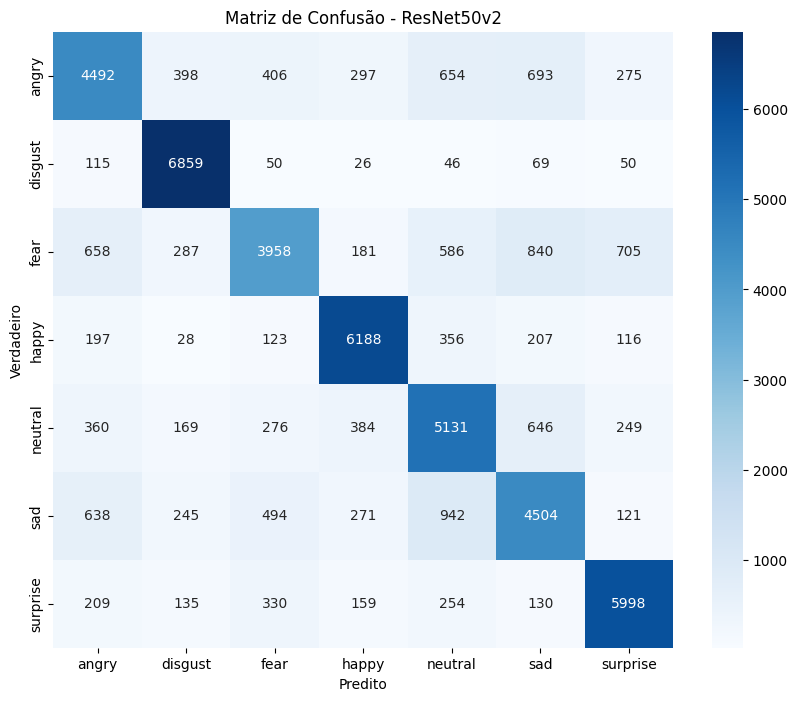

Métricas do modelo: DenseNet201
Accuracy Score:   0.6976
Precision Score:  0.6893
Recall Score:     0.6976
F1 Score:         0.6903

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.57      0.60      7215
           1       0.84      0.96      0.90      7215
           2       0.64      0.48      0.55      7215
           3       0.77      0.86      0.81      7215
           4       0.60      0.64      0.62      7215
           5       0.59      0.55      0.57      7215
           6       0.75      0.82      0.78      7215

    accuracy                           0.70     50505
   macro avg       0.69      0.70      0.69     50505
weighted avg       0.69      0.70      0.69     50505


Acurácia por classe:
- angry: 56.88%
- disgust: 96.12%
- fear: 47.97%
- happy: 86.04%
- neutral: 63.60%
- sad: 55.29%
- surprise: 82.38%


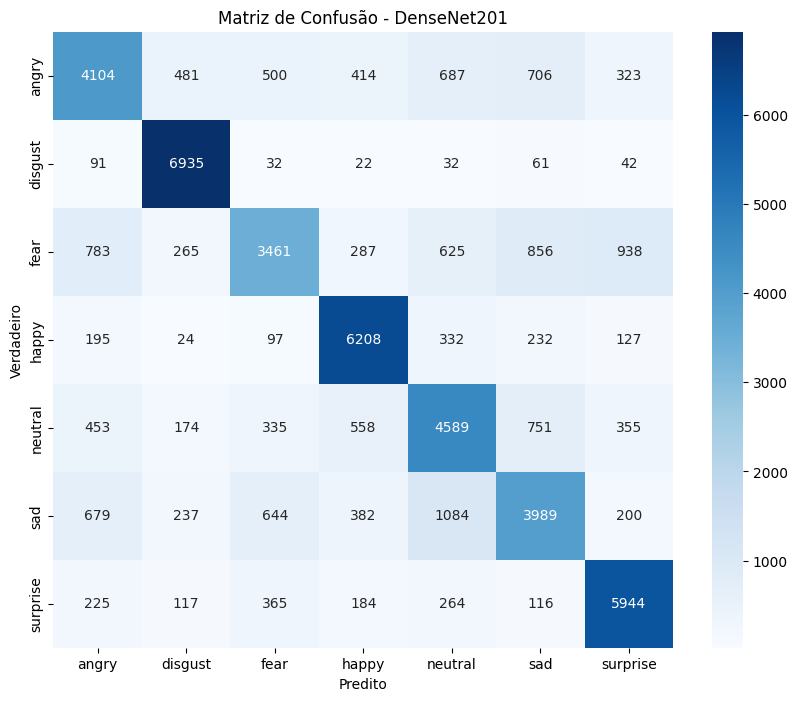

Métricas do modelo: VGG19
Accuracy Score:   0.5495
Precision Score:  0.5334
Recall Score:     0.5495
F1 Score:         0.5286

Classification Report:

              precision    recall  f1-score   support

           0       0.48      0.38      0.42      7215
           1       0.61      0.89      0.72      7215
           2       0.50      0.25      0.34      7215
           3       0.61      0.76      0.68      7215
           4       0.49      0.43      0.46      7215
           5       0.43      0.38      0.40      7215
           6       0.62      0.74      0.68      7215

    accuracy                           0.55     50505
   macro avg       0.53      0.55      0.53     50505
weighted avg       0.53      0.55      0.53     50505


Acurácia por classe:
- angry: 37.95%
- disgust: 88.68%
- fear: 25.32%
- happy: 76.30%
- neutral: 43.49%
- sad: 38.48%
- surprise: 74.44%


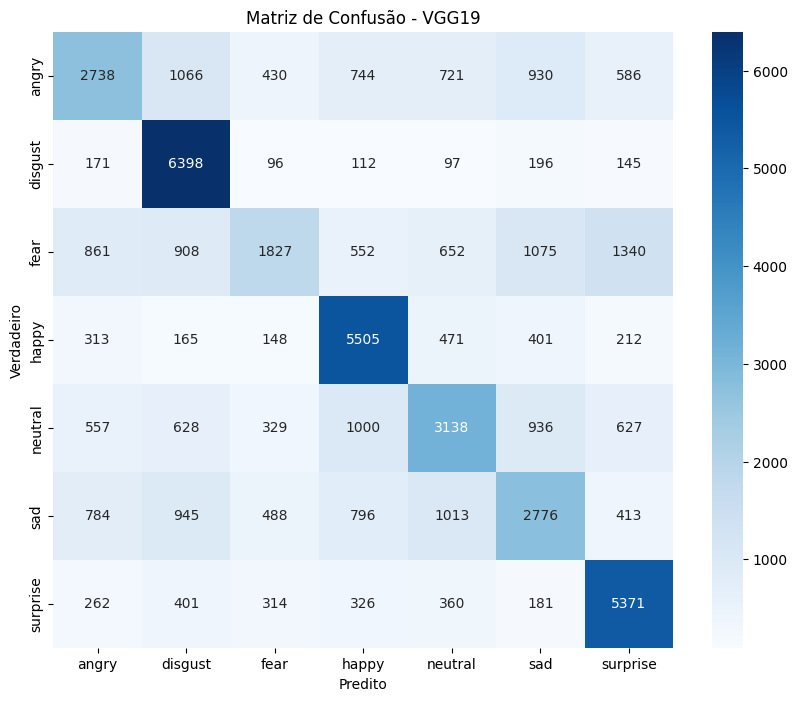

In [14]:
metrics = {}
for model_name, preds in y_preds.items():
    metrics[model_name] = show_metrics(y_train, preds, model_name, "confusion_matrix_completa_flatten", LABEL_MAP)

In [15]:
y_preds_teste = {}
for model_name, model in models.items():
    y_preds_teste[model_name] = get_preds(X_test_resized, model)

225/225 ━━━━━━━━━━━━━━━━━━━━ 97s 424ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 174s 763ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.5475
Precision Score:  0.5095
Recall Score:     0.5367
F1 Score:         0.5179

Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       958
           1       0.36      0.56      0.44       111
           2       0.44      0.32      0.37      1024
           3       0.74      0.72      0.73      1774
           4       0.48      0.56      0.51      1233
           5       0.45      0.45      0.45      1247
           6       0.67      0.72      0.69       831

    accuracy                           0.55      7178
   macro avg       0.51      0.54      0.52      7178
weighted avg       0.55      0.55      0.54      7178


Acurácia por classe:
- angry: 43.53%
- disgust: 55.86%
- fear: 31.54%
- happy: 72.32%
- neutral: 55.88%
- sad: 44.99%
- surprise: 71.60%


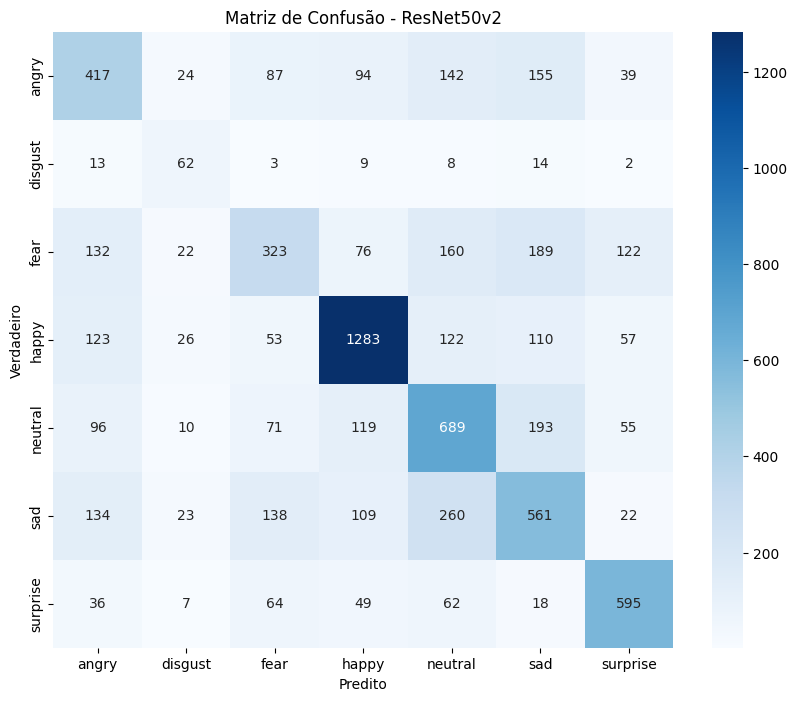

Métricas do modelo: DenseNet201
Accuracy Score:   0.5553
Precision Score:  0.5295
Recall Score:     0.5403
F1 Score:         0.5316

Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       958
           1       0.46      0.55      0.50       111
           2       0.47      0.32      0.38      1024
           3       0.70      0.75      0.73      1774
           4       0.47      0.55      0.51      1233
           5       0.47      0.45      0.46      1247
           6       0.66      0.71      0.69       831

    accuracy                           0.56      7178
   macro avg       0.53      0.54      0.53      7178
weighted avg       0.55      0.56      0.55      7178


Acurácia por classe:
- angry: 44.78%
- disgust: 54.95%
- fear: 32.32%
- happy: 75.48%
- neutral: 55.31%
- sad: 44.51%
- surprise: 70.88%


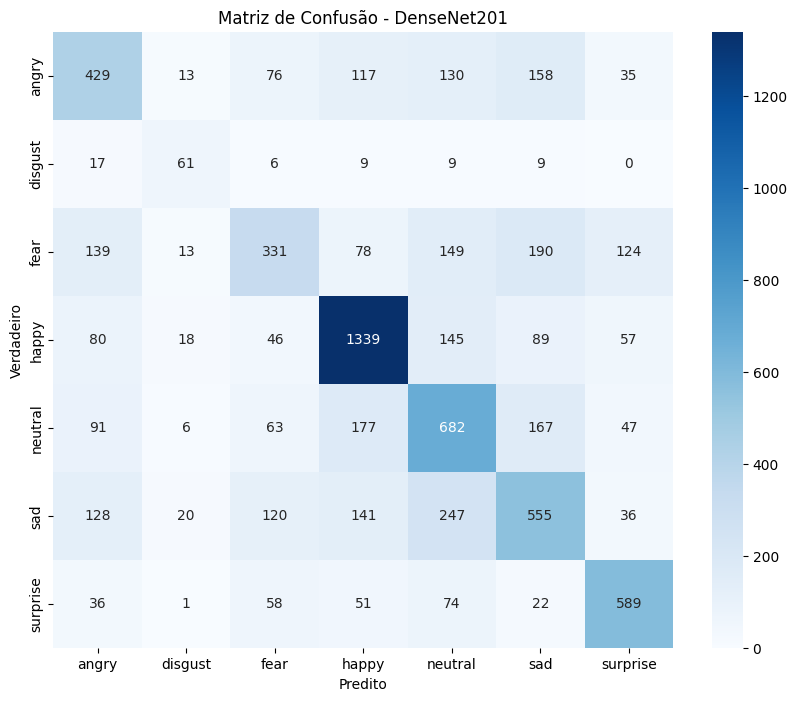

Métricas do modelo: VGG19
Accuracy Score:   0.4804
Precision Score:  0.4244
Recall Score:     0.4551
F1 Score:         0.4244

Classification Report:

              precision    recall  f1-score   support

           0       0.39      0.36      0.37       958
           1       0.15      0.41      0.22       111
           2       0.41      0.21      0.28      1024
           3       0.60      0.73      0.65      1774
           4       0.45      0.45      0.45      1233
           5       0.41      0.35      0.38      1247
           6       0.58      0.67      0.62       831

    accuracy                           0.48      7178
   macro avg       0.42      0.46      0.42      7178
weighted avg       0.47      0.48      0.47      7178


Acurácia por classe:
- angry: 35.70%
- disgust: 41.44%
- fear: 21.19%
- happy: 72.60%
- neutral: 45.26%
- sad: 35.12%
- surprise: 67.27%


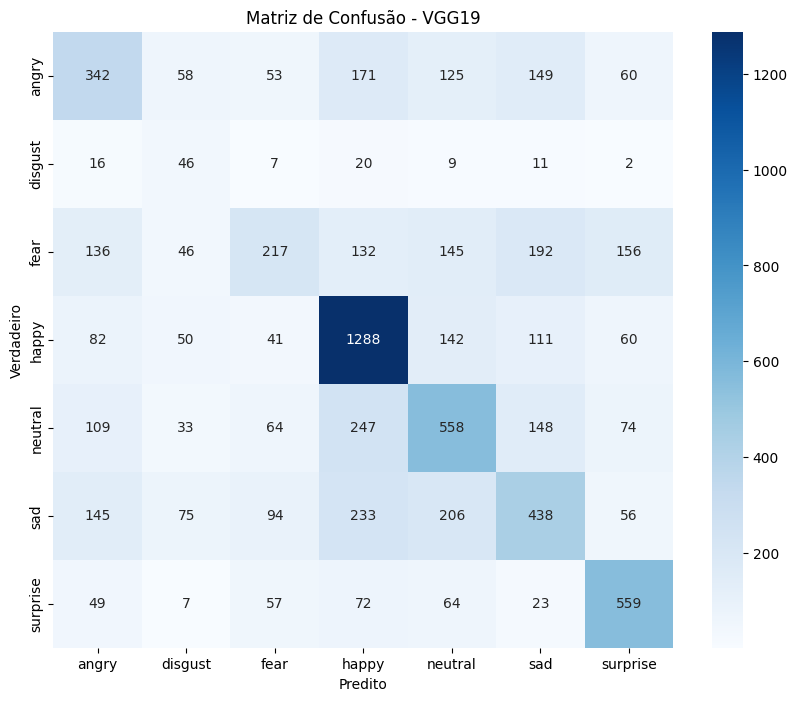

In [16]:
metrics_teste = {}
for model_name, preds in y_preds_teste.items():
    metrics_teste[model_name] = show_metrics(y_test, preds, model_name,"confusion_matrix_completa_flatten", LABEL_MAP, is_test=True)